In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

F:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


##### Reading Files 

In [2]:
def read_dataset():
    df = pd.read_csv("BankNote.csv", header=None)
    df.columns = ['c1', 'c2', 'c3', 'c4', 'o']
    X = df.iloc[:,:4]
    Y = df.iloc[:,4]
    Y = pd.get_dummies(Y)  # One Hot Encoding
    return(X,Y,df)

##### Shuffle the dataset to mix up the rows. Convert the dataset into train and test part and INITIALIZING VARIABLES

In [3]:
X, Y, df = read_dataset()
X, Y = shuffle(X, Y, random_state=1)
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=.20, random_state=415)
learning_rate = .1
training_epochs = 501  #Loops
n_features = X.shape[1]    # features in X
n_class = Y.shape[1]    #classes in y
n_hidden_1 = 10
n_hidden_2 = 10

x = tf.placeholder(tf.float32, [None, n_features])
y = tf.placeholder(tf.float32, [None, n_class])

##### Classes Counts

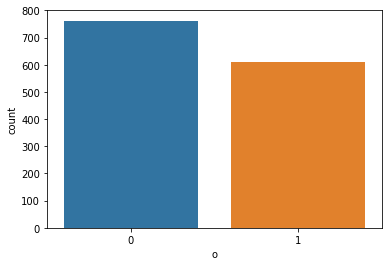

In [4]:
sns.countplot(data=df,x="o")

##### Correlation

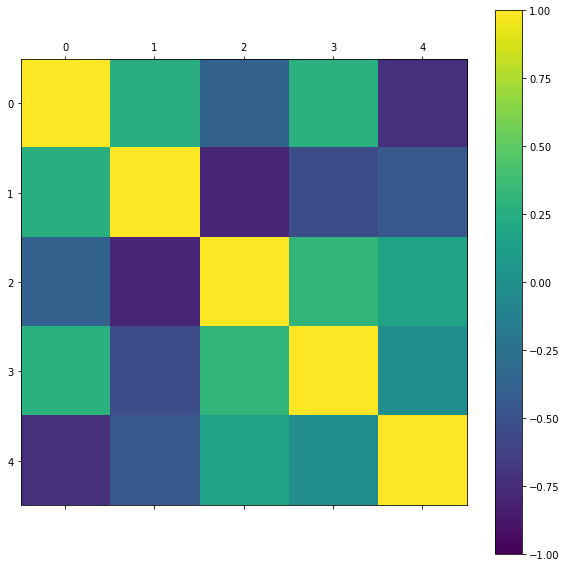

In [5]:
# correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
fig.set_size_inches(10,10)
plt.show()

##### Pair Plot

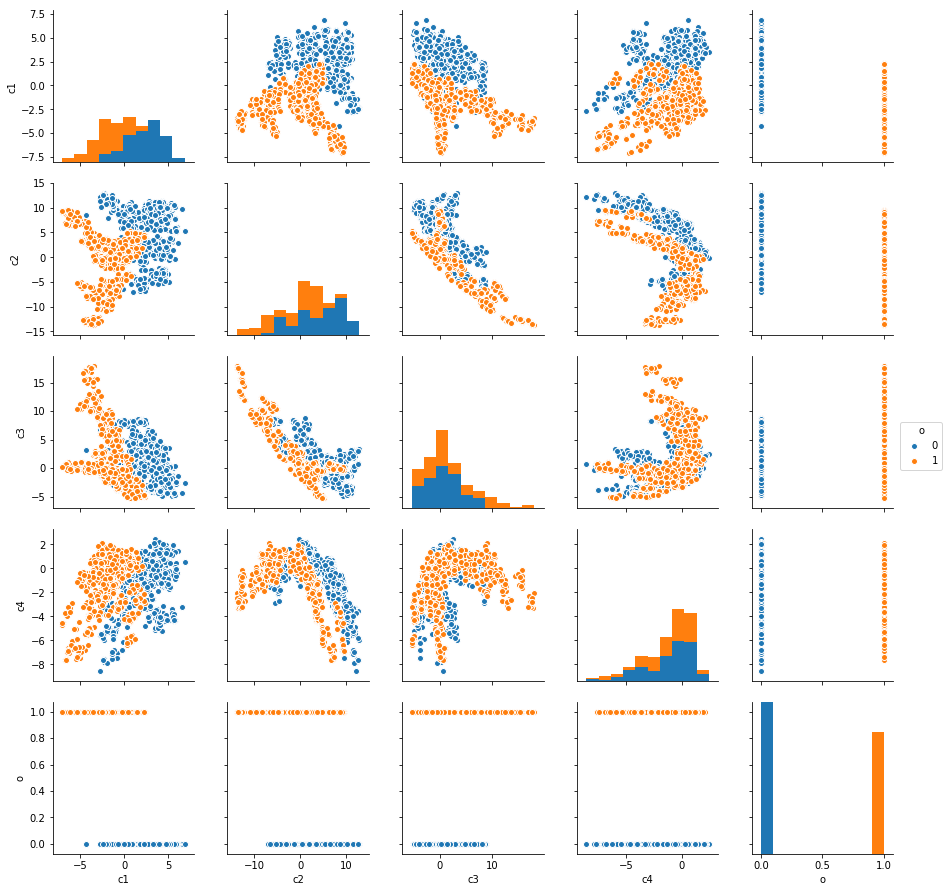

In [6]:
sns.pairplot(data=df, hue='o')

##### Initializing WEIGHTS & BIASES

In [7]:
Weights = {
    'W1' : tf.Variable(tf.truncated_normal([n_features, n_hidden_1])),
    'W2' : tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'out' : tf.Variable(tf.truncated_normal([n_hidden_2, n_class]))
}
biases = {
    'b1' : tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2' : tf.Variable(tf.truncated_normal([n_hidden_2])),
    'out' : tf.Variable(tf.truncated_normal([n_class]))
}


##### Forward Propogation

In [17]:
def forward_propogation(X, Weights, biases):
    Layer1 = tf.nn.relu(tf.add(tf.matmul(X, Weights['W1']), biases['b1']))
    Layer2 = tf.nn.relu(tf.add(tf.matmul(Layer1, Weights['W2']), biases['b2']))
    y_ = tf.add(tf.matmul(Layer2, Weights['out']), biases['out'])
    return y_

##### Global initializer

In [18]:
init = tf.global_variables_initializer()

##### Model

In [19]:
y_ = forward_propogation(x, Weights, biases)
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
test_log=[]
train_log=[]
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={x:train_X, y:train_y})
        training_cost = sess.run(cost_function, feed_dict={x:train_X, y:train_y})
        test_cost = sess.run(cost_function, feed_dict={x:test_X, y:test_y})
        train_log.append(training_cost)
        test_log.append(test_cost)
        if(epoch%50 == 0):
            print(epoch,"  training cost",training_cost,"  test_cost",test_cost)
    test_pred = sess.run( y_, feed_dict={ x:test_X } )
    File_Writer = tf.summary.FileWriter(r"E:\Jupyter\Deep Learning\TenserFlow\BankNotes\graph\bank_note_graph",sess.graph)

0   training cost 5.027633   test_cost 4.512566
50   training cost 0.030975727   test_cost 0.028358892
100   training cost 0.012703391   test_cost 0.012579884
150   training cost 0.007985508   test_cost 0.007996013
200   training cost 0.0058121486   test_cost 0.0059026736
250   training cost 0.004566609   test_cost 0.004715864
300   training cost 0.0037596214   test_cost 0.0039329096
350   training cost 0.0031909628   test_cost 0.0033715365
400   training cost 0.0027653242   test_cost 0.0029581077
450   training cost 0.0024260483   test_cost 0.0026261075
500   training cost 0.00215189   test_cost 0.002369486


Text(0,0.5,'cost')

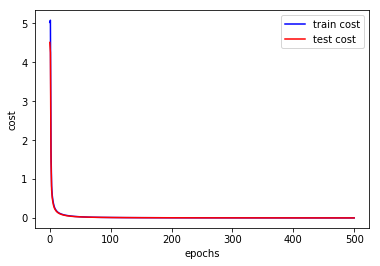

In [20]:
plt.plot(range(training_epochs), train_log, 'b')
plt.plot(range(training_epochs), test_log, 'r')
plt.legend(("train cost","test cost"))
plt.xlabel("epochs")
plt.ylabel("cost")

##### Converting One Hot Encoding to 1D array

In [21]:
test_pred_normal = np.argmax(test_pred, axis=1)
test_y_normal = np.argmax(test_y.as_matrix(), axis=1)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


##### Confusion Matrix

In [22]:
print(confusion_matrix(test_y_normal,test_pred_normal))

[[154   0]
 [  0 121]]
